In [1]:
import requests
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Import the csv containing the scraped data

In [2]:
data = pd.read_csv('lebensmittelwarnungen.csv')

## Analyze the data

### Most common warning reasons
Lets analyse the reasons for which products are being called back.

In [3]:
data.head()

,warningtype,date,producer,product,reason,state,source,thumbnail,detail_link
0,Lebensmittel,13.04.2022,Firma Fromagerie Jacquin,Selles sur Cher,Verdacht auf Kontamination mit unerwünschten B...,"Bayern, Berlin, Nordrhein-Westfalen, Sachsen",NaN,https://www.lebensmittelwarnung.de/bvl-lmw-de/...,https://www.lebensmittelwarnung.de/bvl-lmw-de/...
1,Lebensmittel,12.04.2022,Jentschura International GmbH Otto-Hahn-...,WurzelKraftPflanzliches Feingranulat zum Verze...,Nachweis von Salmonellen,"Baden-Württemberg, Bayern, Berlin, Hessen, Nie...",Jentschura International GmbH,https://www.lebensmittelwarnung.de/bvl-lmw-de/...,https://www.lebensmittelwarnung.de/bvl-lmw-de/...
2,Lebensmittel,08.04.2022,Ferrero Deutschland GmbH Hainer Weg 120 60...,Erneute Ausweitung des Rückrufes von diversen ...,Die genannten Produkte stehen in einem mutmaßl...,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",Ferrero Deutschland GmbH,https://www.lebensmittelwarnung.de/bvl-lmw-de/...,https://www.lebensmittelwarnung.de/bvl-lmw-de/...
3,Lebensmittel,07.04.2022,Ferrero Deutschland GmbH\r Hainer Weg 120\...,Erneute Ausweitung des Rückrufes von diversen ...,Die genannten Produkte stehen in einem möglich...,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",Ferrero Deutschland GmbH,https://www.lebensmittelwarnung.de/bvl-lmw-de/...,https://www.lebensmittelwarnung.de/bvl-lmw-de/...
4,Lebensmittel,06.04.2022,Ferrero Deutschland GmbH\r Hainer Weg 120\...,Ausweitung des Rückrufes von diversen Schokola...,Die genannten Produkte stehen in einem möglich...,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",Ferrero Deutschland GmbH,https://www.lebensmittelwarnung.de/bvl-lmw-de/...,https://www.lebensmittelwarnung.de/bvl-lmw-de/...


In [4]:
data.reason.value_counts()

Salmonellen                                                                                              11
Ethylenoxid                                                                                               8
Grenzüberschreitung bzgl. Ethylenoxid                                                                     5
Ethylenoxid oberhalb der zulässigen Höchstmengen nachgewiesen                                             4
Der festgestellte Ethylenoxid-Gehalt liegt über dem zugelassenen Grenzwert.                               4
                                                                                                         ..
erhöhter Delta-9-Tetrahydrocannabinol-Gehalt                                                              1
Im Rahmen einer Routinekontrolle wurden in einer Einzelprobe Salmonellen festgestellt.                    1
Es kann nicht ausgeschlossen werden, dass Gluten in dem Produkt enthalten ist                             1
Nachweis von Ergotalkaloiden

At first glance, salmonella seem to be the most common reason but Ethylenoxid is in second place and with a differing title also in third place. We will thus have to identify if there are any reasons that occur with multiple different spellings. Create a list of common categories to categorize each entry.

In [5]:
data.reason.unique()

array(['Verdacht auf Kontamination mit unerwünschten Bakterien Listeria Monocytogenes.',
       'Nachweis von Salmonellen',
       'Die genannten Produkte stehen in einem mutmaßlichen Zusammenhang mit einem Salmonellen-Ausbruchsgeschehen',
       'Die genannten Produkte stehen in einem möglichen Zusammenhang mit einem Salmonellen-Ausbruchsgeschehen.',
       'nicht deklariertes Milcheiweiß',
       'Eigenuntersuchungen haben gezeigt, dass das Produkt Salmonellen aufweisen kann',
       'nicht deklariertes Allergen Sulfit',
       'Fehlende Kennzeichnung des allergenen Zusatzstoffes Schwefeldioxid',
       'Belastung mit Ethylenoxid',
       'Aufgrund eines Etikettierungsfehlers auf dem Becher-Boden und auf der Becher-Seite kann bei einzelnen Produkten mit der Deckel-Etikettierung Garnelensalat mit Cocktail-Creme (125 g) der Marke NADLER die Ausweisung der Allergene Garnelen, Sahne und Natriummetabisulfit und die Spurenhinweise für Fisch, Soja, Sellerie, Sesam und Gluten fehlen.',
     

#### Creating a Wordcloud
Plotting a simple wordcloud can give us a feeling for the content that we can expect in the description fields. We filter out common stop words as well as words that occur often in the descriptions but that are not related to the reason for which a product is taken off the market.

In [6]:
#get list of German stopwords like "and" "or" and others
stopwords = requests.get('https://raw.githubusercontent.com/stopwords-iso/stopwords-de/master/stopwords-de.txt').text.split('\n')

In [7]:
stopwords_addition = ['am', 'an', 'artikel', 'aufgrund', 'ausgeschlossen', 'befinden', 'betroffenen', 'charge', 'das', 'der', 'die', 'durch', 'einzelnen', 'enthalten', 'enthält', 'erhöhte', 'erhöhter', 'erhöhter', 'festgestellt', 'flaschen', 'führen', 'gefunden', 'gehalt', 'genannten', 'gering', 'geringe', 'grund', 'im', 'kann', 'mit', 'mögliche', 'nachgewiesen', 'nachweis', 'nicht', 'probe', 'produkt', 'produkte', 'produkten', 'produktes', 'rahmen', 'verwendet', 'werden', 'zutat']

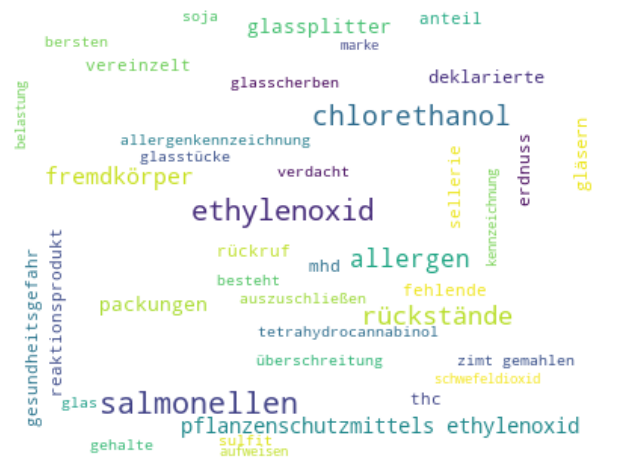

In [8]:
#generate the wordcloud
wordcloud = WordCloud(max_font_size=20, max_words=40, width=400, height=300, background_color="white", stopwords=stopwords + stopwords_addition).generate(' '.join(data.reason.unique()).lower())
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Data Cleaning and Encoding
First, let's remove an outlier in the state column. There is one row that in its list of applicable states also contains "Deutschland" which is not a state in Germany but the whole country itself. Thus, we will remove this row.

In [9]:
data.drop(data[data["state"].str.contains("Deutschland")].index, inplace=True)

In [10]:
#create list with common reasons
common_reasons = [
    "Salmonellen",
    "Chlorpyrifos",
    "Ethylenoxid",
    "Allergen",
    "Allergiker",
    "Schimmel",
    "Johannisbrotkernmehl",
    "Schimmel",
    "Aflatoxin",
    "Jod",
    "Blei",
    "Nüsse",
    "Sellerie",
    "Pyrrolizidinalkaloid",
    "THC",
    "Erdnuss",
    "Chlorethanol",
    "falsche Auslobung"
]

Let's append the reason categories and the countries as individual one-hot encoded features to our dataset

In [11]:
#create a new column for each major reason and one-hot encode if it is part of the description
for reason in common_reasons:
    data['reason_' +  reason] = data["reason"].apply(lambda x: 1 if reason.lower() in str(x).lower() else 0)

Let's create a dedicated column for the reason of debris in the food. It will subsume all occurences of glas, plastic, metal and other word occurrences in the reason text.

In [12]:
#create Fremdkörper column to subset all reasons containing mechanical parts being accidentally put into the food
data["reason_Fremdkörper"] = data["reason"].apply(lambda x: 1 if ("glas" in x.lower() or "metall" in x.lower() or "plastik" in x.lower() or "fremdkörper" in x.lower()) else 0)

Let's create a column for each state and encode (1,0) if a given warning applies to this state or not. 

In [13]:
#create a list with all possible states (Bundesländer)
statelist = []
for states in data.state:
    for state in states.split(','):
        statelist.append(state.strip()) 
statelist = set(statelist)

In [14]:
#one-hot encode the possible states and append a column with each state to the dataframe
for state in statelist:
    data['state_' + state] = data["state"].apply(lambda x: 1 if state in [word.strip() for word in x.split(',')] else 0)

Now, the dataframe contains a one-hot encoded column for each major reason category and for each state. This will make plotting and analysis much easier than having this data nested in lists within columns.

In [15]:
#look at exemplary one-hot encoded data for state=Berlin and reason=Salmonellen
data[["state","state_Berlin","reason_Salmonellen"]]

,state,state_Berlin,reason_Salmonellen
0,"Bayern, Berlin, Nordrhein-Westfalen, Sachsen",1,0
1,"Baden-Württemberg, Bayern, Berlin, Hessen, Nie...",1,1
2,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",1,1
3,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",1,1
4,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",1,1
...,...,...,...
244,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",1,0
245,"Baden-Württemberg, Bayern, Hessen, Niedersachs...",0,0
246,"Baden-Württemberg, Bayern, Berlin, Brandenburg...",1,0
247,"Bayern, Hamburg, Niedersachsen, Nordrhein-West...",0,0


### Data Visualization
Looking at the most mentioned reasons, we can see Ethylenoxid and Salmonella to be the most mentioned reasons. Ethylenoxid is a pesticide that is known to cause cancer and that is forbidden in the EU. 

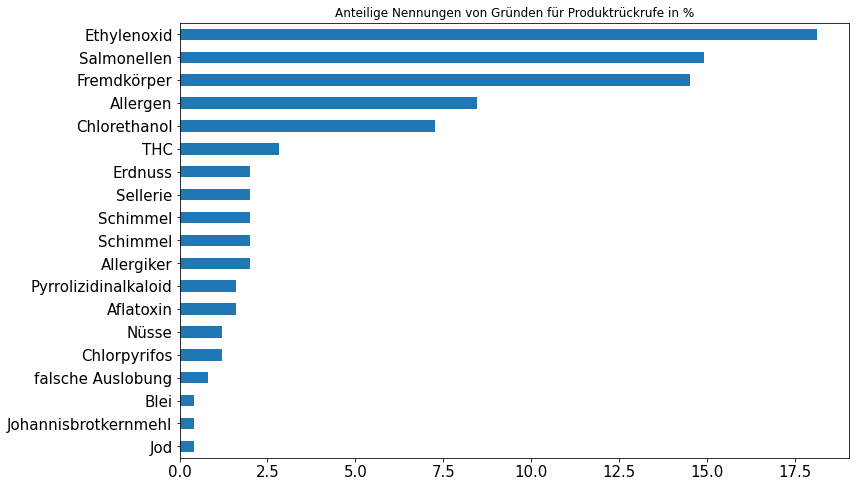

In [20]:
reason_count = data[["reason_" + col for col in common_reasons]+["reason_Fremdkörper"]].sum().sort_values()
reason_count.index = [idx.replace("reason_","") for idx in reason_count.index]
reason_count_pct = reason_count.apply(lambda x: x/len(data)*100)
reason_count_pct.plot(kind="barh", figsize=(12,8), fontsize=15, title="Anteilige Nennungen von Gründen für Produktrückrufe in %")

Looking at the most mentioned producers, we can see that no producer is mentioned particularly often - most of them only once. I have recently heard about the supplement company "Bärbel Drexel" and the chocolate brand "Ferrero" that they had multiple consecutive product recalls which we can see in the data as well as both are among the top mentioned companies. 

C:\Users\leobo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\leobo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


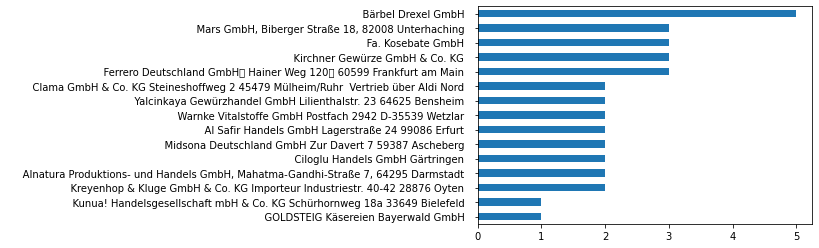

In [17]:
data.producer.value_counts()[:15].sort_values().plot(kind="barh")

Plotting how often a region is mentioned shows us that the state mentioned most often (NRW) is mentioned 30% more often than the least mentioned state (Mecklenburg-Vorpommern).

In [18]:
#create series with occurrence count for each region
state_count = data[['state_' + region for region in statelist]].sum().sort_values()
state_count.index = [idx.replace("state_","") for idx in state_count.index]
#create series with partial count for each region in % of total count
state_count_pct = state_count.apply(lambda x: round(x/len(data)*100,1))

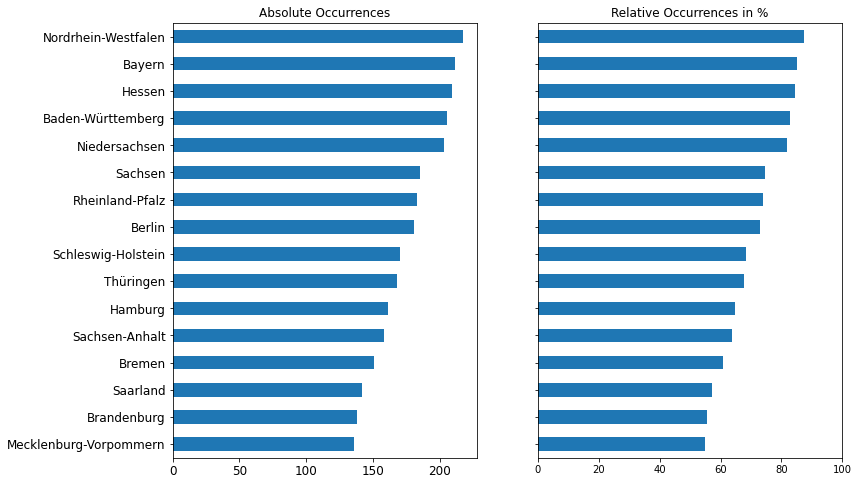

In [19]:
fig, axes = plt.subplots(ncols=2)
axes[0].set_title(label="Absolute Occurrences")

axes[1].set_title(label="Relative Occurrences in %")

state_count.plot(kind='barh',figsize=(12,8), fontsize=12, ax=axes[0])
state_count_pct.plot(kind='barh', figsize=(12,8),ax=axes[1], xlim=(0,100))
axes[1].set_yticklabels([])
plt.show()